Este conjunto de datos obtiene el precio de casas expresado por unidad de area. Los datos contienen la fecha de la última transacción sobre la propiedad, la edad de la casa, la distancia a la estación de metro más cercana, la cantidad de tiendas cercanas, latitud y longitud.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("real_state.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop(columns=["No","X1 transaction date","X5 latitude","X6 longitude"], inplace=True)

data = df.values[:,:3]
data_columns = list(df.columns.values[:3])
target=df.values[:,3]
data

array([[ 32.     ,  84.87882,  10.     ],
       [ 19.5    , 306.5947 ,   9.     ],
       [ 13.3    , 561.9845 ,   5.     ],
       ...,
       [ 18.8    , 390.9696 ,   7.     ],
       [  8.1    , 104.8101 ,   5.     ],
       [  6.5    ,  90.45606,   9.     ]])

### Definir y entrenar regresor

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [5]:
mlp = MLPRegressor(max_iter=7000,
                   hidden_layer_sizes=(6),
                   activation='logistic',
                   learning_rate_init=0.03,  
                   verbose = False
                   )
mlp.fit(X_train, y_train)
print("Cantidad de iteraciones: " +str(mlp.n_iter_))

Cantidad de iteraciones: 346


### Evaluar error obtenido

In [6]:
y_pred = mlp.predict(X_test)
error = metrics.mean_squared_error(y_test,y_pred)
print(error)

230.4860058207339


### Prueba

Predecir y comparar el resultado para 10 valores cualquiera del conjunto de prueba
- ¿Qué diferencia existe entre el valor obtenido del real?
- Predecir los mismos valores utilizando un árbol de desición. ¿Cuál método se adapta mejor a los datos?

# Normalizar datos (min - max)

In [7]:
def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

data = minmax_norm(data)

print(data)

     X2 house age  X3 distance to the nearest MRT station  \
0        0.730594                                0.000009   
1        0.445205                                0.000044   
2        0.303653                                0.000083   
3        0.303653                                0.000083   
4        0.114155                                0.000057   
..            ...                                     ...   
409      0.312785                                0.629160   
410      0.127854                                0.000010   
411      0.429224                                0.000057   
412      0.184932                                0.000013   
413      0.148402                                0.000010   

     X4 number of convenience stores  Y house price of unit area  
0                                1.0                    0.275705  
1                                0.9                    0.314832  
2                                0.5                    0.361237  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)

In [9]:
mlp = MLPRegressor(max_iter=7000,
                   hidden_layer_sizes=(100),
                   activation='logistic',
                   learning_rate_init=0.01,  
                   verbose = False
                   )
mlp.fit(X_train, y_train)
print("Cantidad de iteraciones: " +str(mlp.n_iter_))

Cantidad de iteraciones: 3057


In [10]:
y_pred = mlp.predict(X_test)
error = metrics.mean_squared_error(y_test, y_pred)
print(error)

3.3444172712726368


Predecir y comparar el resultado para 10 valores cualquiera del conjunto de prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
value = X_train.values[5]
random_train = []
random_output = []

size = len(X_train)
index = np.random.choice(range(size-1),size=10,replace=False)

for x in index:
    random_train.append(X_train.iloc[x].tolist())
    random_output.append(y_train[x])

print(random_output)

[17.7, 36.6, 48.2, 42.0, 53.0, 39.1, 37.4, 34.4, 42.8, 57.4]


In [12]:
prediction = mlp.predict(random_train)
neural_network_predict = list()
for x, y in zip(random_train, random_output):
    neural_network_predict_temp = mlp.predict(np.array(x).reshape(1, -1))
    print(f"El valor de y fue:{neural_network_predict_temp[0]}, valor real {y}")
    neural_network_predict.append(neural_network_predict_temp[0])
        

El valor de y fue:17.59418279408569, valor real 17.7
El valor de y fue:36.60621515764367, valor real 36.6
El valor de y fue:48.22013130529752, valor real 48.2
El valor de y fue:42.038733974869665, valor real 42.0
El valor de y fue:53.04118123871677, valor real 53.0
El valor de y fue:39.12477090537892, valor real 39.1
El valor de y fue:37.409779913830164, valor real 37.4
El valor de y fue:34.406590340999294, valor real 34.4
El valor de y fue:42.76726801289963, valor real 42.8
El valor de y fue:57.503328835079074, valor real 57.4


In [13]:
reg = DecisionTreeRegressor(max_depth=4)
reg = reg.fit(random_train, random_output)
tree_prediction = reg.predict(random_train)
print(tree_prediction)

[17.7 37.7 48.2 42.  53.  37.7 37.7 34.4 42.8 57.4]


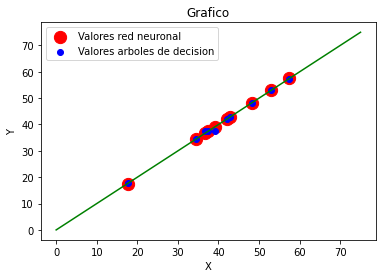

In [14]:
ax = random_output
ay = neural_network_predict
bx = random_output
by = tree_prediction.tolist()
#plt.figure(figsize=(15,15))
plt.scatter(ax,ay,color='red',label='Valores red neuronal', s=150) 
plt.scatter(bx,by,color='blue',label='Valores arboles de decision') 
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Grafico")
plt.legend(loc='best')
plt.plot([75, 0], [75, 0], 'g-')

plt.show()

Predecir los mismos valores utilizando un árbol de desición. ¿Cuál método se adapta mejor a los datos?

Para este caso la diferencia entre la red neuronal y el arbol de decision es minima. Pero teniendo en cuenta las ventajas de visualizacion del arbol de decision concluimos que es mejor.